In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
import os

leagues = []

directory = "../league"
count = 1
for filename in os.listdir(directory):
    table = pd.read_csv(directory + "/" + filename)
    leagues.append(table)

In [3]:
goals = []
for league in leagues:
    goals.append(league["GF"].sum())

In [4]:
scorers = [
    "Lionel Messi",
    "Cristiano Ronaldo",
    "Lionel Messi",
    "Lionel Messi",
    "Cristiano Ronaldo",
    "Cristiano Ronaldo",
    "Luis Suarez",
    "Lionel Messi",
    "Lionel Messi",
    "Lionel Messi"
]

In [5]:
seasons = ["09/10","10/11","11/12","12/13","13/14","14/15","15/16","16/17","17/18","18/19"]

In [6]:
points = []
for league in leagues:
    points.append(league["Pts"].sum())

In [7]:
points

[1045, 1061, 1046, 1056, 1054, 1049, 1048, 1051, 1054, 1030]

In [8]:
avg_points = []
for league in leagues:
    avg_points.append(league["Pts"].mean())

In [9]:
avg_points

[52.25, 53.05, 52.3, 52.8, 52.7, 52.45, 52.4, 52.55, 52.7, 51.5]

In [10]:
avg_goals = []
for league in leagues:
    avg_goals.append(league["GF"].mean())

In [11]:
avg_goals

[51.55, 52.1, 52.5, 54.55, 52.25, 50.45, 52.15, 55.9, 51.2, 49.15]

In [12]:
goals

[1031, 1042, 1050, 1091, 1045, 1009, 1043, 1118, 1024, 983]

In [13]:
gpg = []
for league in leagues:
    gpg.append(league["GF"].sum() / 760)

In [14]:
gpg = [round(gp,2) for gp in gpg]

In [15]:
ppg = []
for league in leagues:
    ppg.append(league["Pts"].sum() / 760)

In [16]:
ppg = [round(pp,2) for pp in ppg]

In [17]:
columns = ["season","tot_pts","avg_pts","tot_goals","avg_goals","gpg","ppg"]
data = np.array([seasons,points,avg_points,goals,avg_goals,gpg,ppg])

In [18]:
seasons_df = pd.DataFrame()
for index,column in enumerate(columns):
    seasons_df[column] = data[index]

In [19]:
seasons_df.index = list(range(1,11))

In [20]:
seasons_df

,season,tot_pts,avg_pts,tot_goals,avg_goals,gpg,ppg
1,09/10,1045,52.25,1031,51.55,1.36,1.38
2,10/11,1061,53.05,1042,52.1,1.37,1.4
3,11/12,1046,52.3,1050,52.5,1.38,1.38
4,12/13,1056,52.8,1091,54.55,1.44,1.39
5,13/14,1054,52.7,1045,52.25,1.38,1.39
6,14/15,1049,52.45,1009,50.45,1.33,1.38
7,15/16,1048,52.4,1043,52.15,1.37,1.38
8,16/17,1051,52.55,1118,55.9,1.47,1.38
9,17/18,1054,52.7,1024,51.2,1.35,1.39
10,18/19,1030,51.5,983,49.15,1.29,1.36


In [21]:
for column in columns[1:]:
    seasons_df[column] = seasons_df[column].astype(np.dtype("float64"),copy=True)

In [22]:
seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     10 non-null     object 
 1   tot_pts    10 non-null     float64
 2   avg_pts    10 non-null     float64
 3   tot_goals  10 non-null     float64
 4   avg_goals  10 non-null     float64
 5   gpg        10 non-null     float64
 6   ppg        10 non-null     float64
dtypes: float64(6), object(1)
memory usage: 640.0+ bytes


In [30]:
seasons_df

,season,tot_pts,avg_pts,tot_goals,avg_goals,gpg,ppg,highest_scorers,champions
1,09/10,1045.0,52.25,1031.0,51.55,1.36,1.38,Lionel Messi,Barcelona
2,10/11,1061.0,53.05,1042.0,52.10,1.37,1.40,Cristiano Ronaldo,Barcelona
3,11/12,1046.0,52.30,1050.0,52.50,1.38,1.38,Lionel Messi,Real Madrid
4,12/13,1056.0,52.80,1091.0,54.55,1.44,1.39,Lionel Messi,Barcelona
5,13/14,1054.0,52.70,1045.0,52.25,1.38,1.39,Cristiano Ronaldo,Ath Madrid
6,14/15,1049.0,52.45,1009.0,50.45,1.33,1.38,Cristiano Ronaldo,Barcelona
7,15/16,1048.0,52.40,1043.0,52.15,1.37,1.38,Luis Suarez,Barcelona
8,16/17,1051.0,52.55,1118.0,55.90,1.47,1.38,Lionel Messi,Real Madrid
9,17/18,1054.0,52.70,1024.0,51.20,1.35,1.39,Lionel Messi,Barcelona
10,18/19,1030.0,51.50,983.0,49.15,1.29,1.36,Lionel Messi,Barcelona


In [24]:
seasons_df["highest_scorers"] = scorers

In [28]:
champions = []
for league in leagues:
    champions.append(league["Team"][0])

In [29]:
seasons_df["champions"] = champions

Text(0.5, 1.0, 'Highest Goal Scorers')

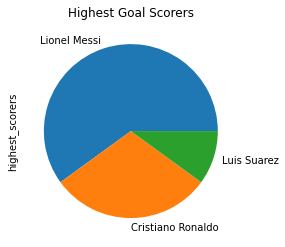

In [52]:
seasons_df["highest_scorers"].value_counts().plot(kind="pie")
plt.title("Highest Goal Scorers")

<AxesSubplot:>

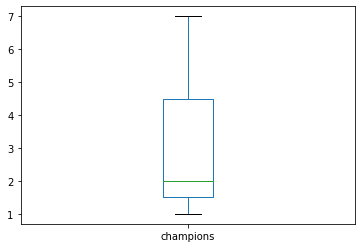

In [35]:
seasons_df["champions"].plot(kind="box")

<AxesSubplot:xlabel='tot_goals'>

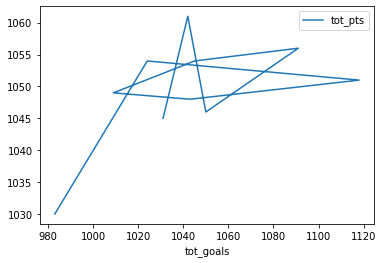

In [33]:
seasons_df.plot(x="tot_goals",y="tot_pts",kind="line")